In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.optimize import curve_fit as cf

In [83]:
# Creating the model, fitting a linear equation

def GW(t, m, c):
    return m*t + c

In [85]:
# Loading the CSV file data

data, freq, time = np.loadtxt('GW_data_file.csv',delimiter=',')

# Obtaining the zero indices

zero_indices=[]

for i in range(len(data)-1):
    if data[i]==0 and data[i+1]!=0:
        zero_indices.append(i)
    elif (data[i]>0 and data[i+1]<0) or (data[i]<0 and data[i+1]>0):
        zero_indices.append(i)
    elif data[i]==0 and data[i+1]==0:
        zero_indices.append(i)
        i=i+1

# Getting frequency greater than 50 Hz

freq50 = []
time50 = []
for f in zero_indices:
    if freq[f]>50:
        freq50.append(freq[f])
        time50.append(time[f])

# Removing frequencies after tc

for t in range(len(time50)):
    if time50[t] > 0:
        i = t     # index where time crosses tc
        break
        
final_f = freq50[0:i]
final_t = time50[0:i]

xdata = np.log(abs(np.asarray(final_t)))
ydata = np.log(abs(np.asarray(final_f)))

In [86]:
# Fitting the curve for these values

p_opt, p_cov = cf(GW, xdata, ydata)
y_new = GW(xdata, *p_opt)

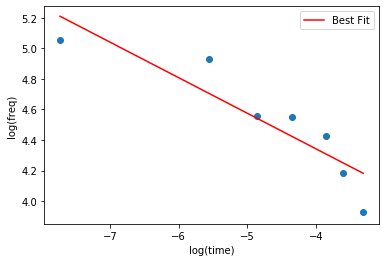

In [87]:
# Plotting the values

plt.scatter(xdata, ydata)
plt.plot(xdata, y_new, label='Best Fit', color='red')
plt.xlabel('log(time)')
plt.ylabel('log(freq)')
plt.legend()

In [88]:
# Printing the optimized parameters

print(p_opt)

[-0.23238806  3.41356699]
